## Project Description: 

In the digital era, people have become increasingly reliant on electronic devices. Social media has subtly altered people’s lifestyles, as social interaction has moved to the digital sphere. People might be more likely to express their true selves when they engage in online platforms because everyone's identities are hidden behind the screen. This project aims to train a model that can effectively predict people's depression status through text analysis of their posts on Reddit. I believe this project would be beneficial for mental health evaluation, providing monitoring and prevention for people who have a tendency to be depressed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

* Link of my dataset: https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned *

In [3]:
# read data from file to a pandas dataframe
path = '/Users/pro/Desktop/Winter 2024/30100/30100_Yunrui/Reddit_depression.csv'
df = pd.read_csv(path) 
# check the shape of the data frame
print(df.shape)

(7731, 2)


In [4]:
# get an overview of the top-n rows/samples
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [5]:
# this dataset has been cleaned, so there is no missing value
null_sum = df.isnull().sum()
null_sum

clean_text       0
is_depression    0
dtype: int64

In [6]:
# convert clean_text to string type
df['clean_text'] = df['clean_text'].astype('string')
df.dtypes

clean_text       string[python]
is_depression             int64
dtype: object

<Axes: xlabel='is_depression', ylabel='count'>

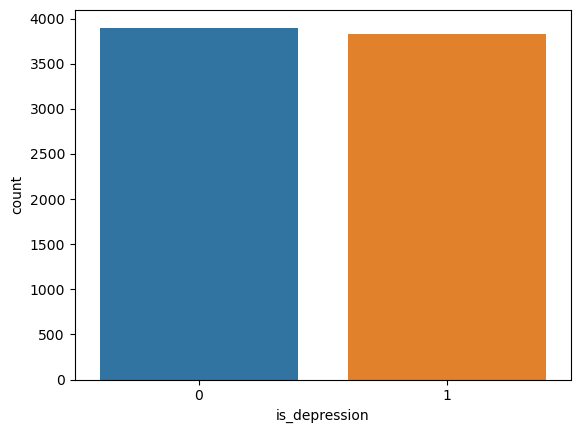

In [7]:
# this indicates that our dataset is pretty balanced
sns.countplot(data=df,x="is_depression")

#### Text transformation 
- tokenization, stemming, lemmatization

In [8]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [9]:
# after inspecting the cleaned text, 
# we realize that the text has been tokenized and lemmatized, 
# but there are still some non words in the text
df['clean_text']

0       we understand that most people who reply immed...
1       welcome to r depression s check in post a plac...
2       anyone else instead of sleeping more when depr...
3       i ve kind of stuffed around a lot in my life d...
4       sleep is my greatest and most comforting escap...
                              ...                        
7726                                         is that snow
7727                   moulin rouge mad me cry once again
7728    trying to shout but can t find people on the list
7729    ughh can t find my red sox hat got ta wear thi...
7730    slept wonderfully finally tried swatching for ...
Name: clean_text, Length: 7731, dtype: string

### Observing the cleaned text, I think the text data has been tokenized, stemed, and lemmatized before. Therefore, I just wrote a function to convert the words that was decontracted back to their origina format

In [10]:
def clean_text(text):
    cleaned_words = []
    for word in text.split():
        if len(word) == 1 and word == "m":
            cleaned_words.append("am")
        elif len(word) == 1 and word == "s":
            cleaned_words.append("is")
        elif len(word) == 1 and word == "t":
            cleaned_words.append("not")
        elif len(word) == 2 and word == "re":
            cleaned_words.append("are")
        elif len(word) == 2 and word == "ve":
            cleaned_words.append("have")
        elif len(word) == 2 and word == "ll":
            cleaned_words.append("will")
        elif len(word) == 2 and word == "wa":
            cleaned_words.append("was")
        elif word.isalpha() == False:
            continue
        else:
            cleaned_words.append(word)
    return " ".join(cleaned_words)

In [11]:
df['clean_text'] = df['clean_text'].apply(clean_text)

In [12]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression is check in post a pla...,1
2,anyone else instead of sleeping more when depr...,1
3,i have kind of stuffed around a lot in my life...,1
4,sleep is my greatest and most comforting escap...,1


### Feature Engineering
- CountVectorizer
Based on the previous project check, Gridsearch and evaluation tests boeh show that countvectorizer would be able to perfrom better than tfidfvectorizer. Therefore, in this final project check, I will mainly focused on countvectorizer. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

## 

In [14]:
# define your own stopwords list
# Exluding NO, NOR, NOT from the stop words as they play keyrole
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","ab", "ai", "af"])



In [15]:
# Function to remove stopwords from text
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

# Apply the function to clean_text column
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [16]:
# use CountVectorizer to convert the cleaned reviews to vectors
vectorizer = CountVectorizer(binary=False, max_df=0.8, min_df=10, ngram_range=(1,1))

# Convert the cleaned reviews to vectors
X = vectorizer.fit_transform(df['clean_text'])
y = df['is_depression']

print("X.shape : ", X.shape)
print("y.shape : ", y.shape)

X.shape :  (7731, 2543)
y.shape :  (7731,)


In [17]:
feature_names = vectorizer.get_feature_names_out()
feature_names[:200]

array(['abandoned', 'ability', 'able', 'absolute', 'absolutely', 'abt',
       'abuse', 'abused', 'abusive', 'academic', 'accept', 'accepted',
       'accepting', 'access', 'accident', 'accidentally', 'accomplish',
       'accomplished', 'account', 'ache', 'achieve', 'achievement',
       'acknowledge', 'across', 'act', 'acted', 'acting', 'action',
       'active', 'actively', 'activity', 'actual', 'actually', 'add',
       'added', 'addict', 'addicted', 'addiction', 'adding', 'adhd',
       'admit', 'admitted', 'adult', 'advance', 'advantage', 'advice',
       'affect', 'affected', 'affecting', 'afford', 'afraid', 'afternoon',
       'afterwards', 'age', 'aggressive', 'ago', 'agree', 'agreed', 'ah',
       'ahead', 'air', 'airport', 'alarm', 'album', 'alcohol',
       'alcoholic', 'alive', 'allergy', 'allow', 'allowed', 'almost',
       'alone', 'along', 'alot', 'already', 'alright', 'also', 'although',
       'always', 'amazing', 'ambition', 'american', 'among', 'amount',
       'amp

- After exploreing different hyperparameters, this list of top features makes the most sense, and I used the stopwords to get rid of many of the non-words. 

### Train test split
- Shuffling the data (random permutations of the collections)
- Split the data into training and testing by 80:20 ratio (you can customize the ratio by yourself)
- Assign a random state for reproducible output

In [18]:
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,
                                                 shuffle=True,
                                                 random_state=42)
# check data size after splitting
print("Training data: X : {}, y : {}".format(X_train.shape, y_train.shape))
print("Testing data: X : {}, y : {}".format(X_test.shape, y_test.shape))

Training data: X : (6184, 2543), y : (6184,)
Testing data: X : (1547, 2543), y : (1547,)


## Train a Machine Learning Model

After we do text preprocessing, text feature representation, and train test split, the next step is model training. The previous project checks help us to narrow our focus down to these three models below that has the best performance:

- Random Forest
- Logistic Regression
- (Deep) Neural Networks


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
# build a random forest classifier for the count vectorized feature matrix
rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
np.round(rf_clf.score(X_train, y_train),3)

0.999

In [22]:
y_true = y
y_pred = rf_clf.predict(X) 
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[3891,    9],
       [  75, 3756]])

In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3900
           1       1.00      0.98      0.99      3831

    accuracy                           0.99      7731
   macro avg       0.99      0.99      0.99      7731
weighted avg       0.99      0.99      0.99      7731



- the report indicates that our current random forest model is performing well.

### Logistic Regression


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# fit the logistic regression model without any regularization
lg = LogisticRegression(random_state=42,solver='liblinear').fit(X_train, y_train)
score1 = np.round(lg.score(X_test, y_test), 3)
score1

0.957

In [26]:
y_true = y
y_pred = lg.predict(X) 
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[3887,   13],
       [ 147, 3684]])

In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3900
           1       1.00      0.96      0.98      3831

    accuracy                           0.98      7731
   macro avg       0.98      0.98      0.98      7731
weighted avg       0.98      0.98      0.98      7731



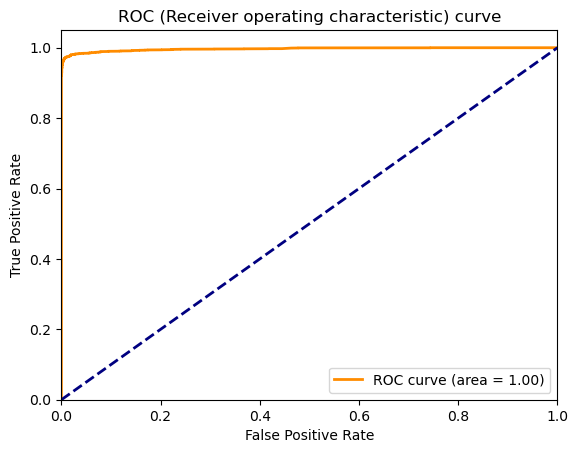

In [28]:
y_score = lg.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
roc_auc = roc_auc_score(y_true, y_score)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver operating characteristic) curve')
plt.legend(loc="lower right")
plt.show()

- based on the previous evaluation, we can see that our logistic regression model is performing well as well. 

## Unsupervised Learning

This week, I will be exploresing PCA and deep learning.

In [29]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA

/Users/pro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


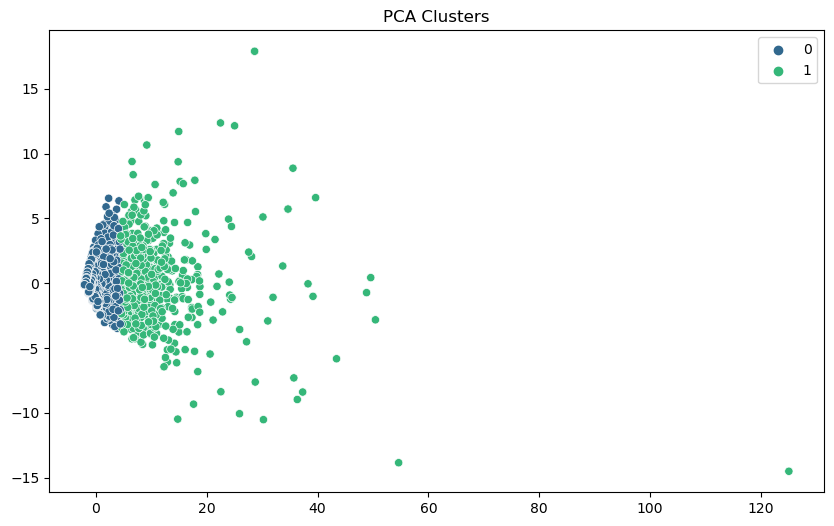

In [30]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
y_pred = kmeans.labels_

# Add the predicted labels to your original dataframe
df['cluster'] = y_pred

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='viridis')
plt.title('PCA Clusters')
plt.show()

In [31]:
pca.explained_variance_ratio_

array([0.2902883 , 0.02392349])

## Kernal PCA

In [32]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Use Kernel PCA with a specific kernel (e.g., 'rbf' for Radial Basis Function)
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)

# Create a new DataFrame with the Kernel PCA results and the 'depression' labels
df_kpca = pd.DataFrame(X_kpca, columns=['PC1', 'PC2'])
df_kpca['depression'] = y 

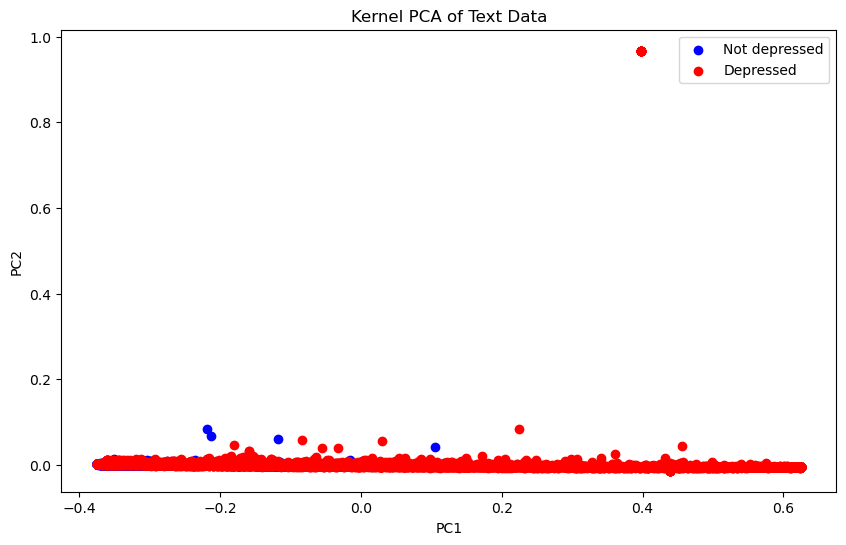

In [33]:
# Scatter plot of the Kernel PCA results
plt.figure(figsize=(10, 6))
plt.scatter(df_kpca[df_kpca['depression'] == 0]['PC1'], df_kpca[df_kpca['depression'] == 0]['PC2'], color='blue', label='Not depressed')
plt.scatter(df_kpca[df_kpca['depression'] == 1]['PC1'], df_kpca[df_kpca['depression'] == 1]['PC2'], color='red', label='Depressed')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA of Text Data')
plt.legend()
plt.show()

- Based on explained ratio result and the graph, I think the current PCA model doesn't work for my dataset. I need to adjust the pattern further, but I am still a bit confused how I can do it. I will discuss with Professor next week

X_train:  (6184, 2543)
X_train_pca:  (6184, 3)


/var/folders/03/2frn0wzx5ql5kmxdbrk9m8100000gn/T/ipykernel_15445/3695212577.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_train_pca[y_train== 0][:, 0], X_train_pca[y_train== 0][:, 1], X_train_pca[y_train== 0][:, 2], c='blue', cmap=plt.cm.nipy_spectral, edgecolor="k")
/var/folders/03/2frn0wzx5ql5kmxdbrk9m8100000gn/T/ipykernel_15445/3695212577.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_train_pca[y_train== 1][:, 0], X_train_pca[y_train== 1][:, 1], X_train_pca[y_train== 1][:, 2], c='red', cmap=plt.cm.nipy_spectral, edgecolor="k")


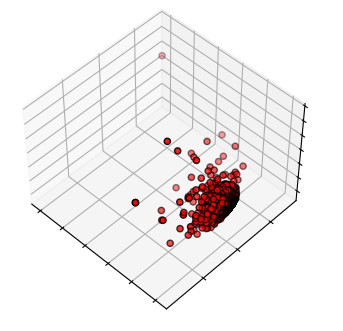

In [70]:
# Visualize the data with 3 PCs

pca = decomposition.PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train.toarray())
print("X_train: ", X_train.shape)
print("X_train_pca: ", X_train_pca.shape)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

# # Reorder the labels to have colors matching the cluster results
# y_color = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_train_pca[y_train== 0][:, 0], X_train_pca[y_train== 0][:, 1], X_train_pca[y_train== 0][:, 2], c='blue', cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.scatter(X_train_pca[y_train== 1][:, 0], X_train_pca[y_train== 1][:, 1], X_train_pca[y_train== 1][:, 2], c='red', cmap=plt.cm.nipy_spectral, edgecolor="k")


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
dt_clf = LogisticRegression(random_state=42, solver = 'newton-cg')
dt_clf = dt_clf.fit(X_train, y_train)
print("original score without PCA: {:.3f}".format(dt_clf.score(X_test, y_test))) 

for k in [5, 25, 125, 625, 100, 2000]:
    # conduct PCA on dataset
    pca = decomposition.PCA(n_components=k)
    x_pca = pca.fit_transform(X.toarray())
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, random_state=42, test_size=0.3)
    
    # model training and evaluation
    best_score = -1
    for c in [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]:
        dt_clf = LogisticRegression(random_state=42, solver='newton-cg', C=c)
        dt_clf = dt_clf.fit(X_train, y_train)
        score = dt_clf.score(X_test, y_test)
        best_score = max(best_score, score) 
    print("PCA(k={}): {:.3f}".format(k, best_score))

original score without PCA: 0.958
PCA(k=5): 0.854
PCA(k=25): 0.935
PCA(k=125): 0.956
PCA(k=625): 0.956
PCA(k=100): 0.949
PCA(k=2000): 0.960


## Summary:

- From the visualization, I think my PCA is not performing really great, However, after running the PCA model trainning for logistic regression, I realized the reason my first two dimension of PCA can only explain a low percentage of the variance because my data need a lot more than 2 dimensions PCA, because it has over 7000 samples, and more than 2500 features. Therefore, the evaluation results shows that when my pca components is about 125 and more, my model would be able to perform really well. However, PCA doesn't significantly improve my model performance, so I don't think it's a must for my final project. 

- I further explored the deep learning model and expect that would perform better than the PCA model. Also, it would be easier for me to ask professors and TAs about my next project check! 

## Deep Learning

In [58]:
import keras
from keras import models, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [59]:
# Define a NN
clf_model = Sequential()
clf_model.add(Dense(2543, input_shape=(2543,), activation='relu'))
clf_model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               325632    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 333953 (1.27 MB)
Trainable params: 333953 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
clf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.toarray(), y_train)).batch(32)


In [63]:
history = clf_model.fit(train_dataset, epochs=100)

Epoch 1/100


194/194 [==============================] - 2s 9ms/step - loss: 0.1738 - accuracy: 0.9274
Epoch 2/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 3/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0257 - accuracy: 0.9929
Epoch 4/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 5/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 6/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 7/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0069 - accuracy: 0.9982
Epoch 8/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 9/100
194/194 [==============================] - 2s 8ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 10/100
194/194 [==============================] - 2s 9ms/step - loss: 0.0048 - accuracy: 0.9987
E

In [71]:
# Convert X_test and y_test to a TensorFlow dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.toarray(), y_test)).batch(32)

# Evaluate the model on the test dataset
test_loss, test_acc = clf_model.evaluate(test_dataset)
print(f"test_acc: {np.round(test_acc, 3)}")

49/49 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.9318
test_acc: 0.932


In [75]:
# inference
y_pred_prob = clf_model.predict(X_test.toarray())
y_pred_labels = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

49/49 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       783
           1       0.95      0.91      0.93       764

    accuracy                           0.93      1547
   macro avg       0.93      0.93      0.93      1547
weighted avg       0.93      0.93      0.93      1547

